In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import datetime


# Awards Dataset

## Events Analysis

In [3]:
awards = pd.read_csv('./data/awards.csv')#, sep = ',', header = 0, names = ['eventId', 'eventName', 'awardName', 'year','occurence', 'winAnnouncementTime', 'categoryName', 'nomeneeNote', 'name'])
awards = awards.dropna(subset = ['eventName', 'awardName','isPrimary', 'isWinner', 'isPerson', 'isTitle','isCompany'])

In [4]:
awards[awards.awardName.apply(lambda x: x== 'Oscar') & awards.year.apply(lambda x: x==2019) & awards.categoryName.apply(lambda x : x == 'Best Achievement in Visual Effects') & awards.isPerson].head()

,eventId,eventName,awardName,year,occurrence,winAnnouncementTime,categoryName,nomeneeNote,name,originalName,...,episodeNames,characterNames,isWinner,isPrimary,isSecondary,isPerson,isTitle,isCompany,const,notes
1019237,ev0000003,"Academy Awards, USA",Oscar,2019,1,1.551063e+09,Best Achievement in Visual Effects,NaN,Paul Lambert,NaN,...,NaN,NaN,True,False,True,True,False,False,nm0995902,NaN
1019238,ev0000003,"Academy Awards, USA",Oscar,2019,1,1.551063e+09,Best Achievement in Visual Effects,NaN,Ian Hunter,NaN,...,NaN,NaN,True,False,True,True,False,False,nm0402843,NaN
1019239,ev0000003,"Academy Awards, USA",Oscar,2019,1,1.551063e+09,Best Achievement in Visual Effects,NaN,Tristan Myles,NaN,...,NaN,NaN,True,False,True,True,False,False,nm1629597,NaN
1019240,ev0000003,"Academy Awards, USA",Oscar,2019,1,1.551063e+09,Best Achievement in Visual Effects,NaN,J.D. Schwalm,NaN,...,NaN,NaN,True,False,True,True,False,False,nm0777069,NaN
1019242,ev0000003,"Academy Awards, USA",Oscar,2019,1,NaN,Best Achievement in Visual Effects,NaN,Dan DeLeeuw,NaN,...,NaN,NaN,False,False,True,True,False,False,nm0216699,NaN


In [5]:
awards[awards.awardName.apply(lambda x: x== 'Oscar') & awards.year.apply(lambda x: x==2019) & awards.categoryName.apply(lambda x : x == 'Best Achievement in Visual Effects') & awards.isTitle].head()

,eventId,eventName,awardName,year,occurrence,winAnnouncementTime,categoryName,nomeneeNote,name,originalName,...,episodeNames,characterNames,isWinner,isPrimary,isSecondary,isPerson,isTitle,isCompany,const,notes
1019236,ev0000003,"Academy Awards, USA",Oscar,2019,1,1.551063e+09,Best Achievement in Visual Effects,NaN,First Man,NaN,...,NaN,NaN,True,True,False,False,True,False,tt1213641,NaN
1019241,ev0000003,"Academy Awards, USA",Oscar,2019,1,NaN,Best Achievement in Visual Effects,NaN,Avengers: Infinity War,NaN,...,NaN,NaN,False,True,False,False,True,False,tt4154756,NaN
1019246,ev0000003,"Academy Awards, USA",Oscar,2019,1,NaN,Best Achievement in Visual Effects,NaN,Christopher Robin,NaN,...,NaN,NaN,False,True,False,False,True,False,tt4575576,NaN
1019251,ev0000003,"Academy Awards, USA",Oscar,2019,1,NaN,Best Achievement in Visual Effects,NaN,Ready Player One,NaN,...,NaN,NaN,False,True,False,False,True,False,tt1677720,NaN
1019256,ev0000003,"Academy Awards, USA",Oscar,2019,1,NaN,Best Achievement in Visual Effects,NaN,Solo: A Star Wars Story,NaN,...,NaN,NaN,False,True,False,False,True,False,tt3778644,NaN


In [6]:
awards = awards[awards.isPrimary & ~(awards.isCompany)]

In [7]:
events_vc = awards.eventName.value_counts()
events_vc.describe()

count     6614.000000
mean       149.404748
std        625.511186
min          1.000000
25%          5.000000
50%         17.000000
75%         73.000000
max      22122.000000
Name: eventName, dtype: float64

In [8]:
list(events_vc[:20].keys())

['Primetime Emmy Awards',
 'Grammy Awards',
 'Online Film & Television Association',
 'BAFTA Awards',
 'Academy Awards, USA',
 'Daytime Emmy Awards',
 'Adult Video News Awards',
 'Young Artist Awards',
 'Academy of Science Fiction, Fantasy & Horror Films, USA',
 'Satellite Awards',
 'Cannes Film Festival',
 'Berlin International Film Festival',
 'Teen Choice Awards',
 'Leo Awards',
 'Venice Film Festival',
 'Gold Derby Awards',
 'Gemini Awards',
 'Italian National Syndicate of Film Journalists',
 'Image Awards (NAACP)',
 'Chicago International Film Festival']

In [9]:
events = awards[['eventName','awardName']].drop_duplicates()
awards_by_event = events.groupby('eventName')['awardName'].agg('count')
top_events = events_vc[:20].reset_index(level = 0).rename(columns = {'eventName':'N_nominees','index':'eventName'})
top_events['N_awards_type'] = top_events['eventName'].apply(lambda x : awards_by_event[x])
top_events

,eventName,N_nominees,N_awards_type
0,Primetime Emmy Awards,22122,12
1,Grammy Awards,16474,1
2,Online Film & Television Association,13056,4
3,BAFTA Awards,12728,39
4,"Academy Awards, USA",11150,13
5,Daytime Emmy Awards,10701,5
6,Adult Video News Awards,7940,7
7,Young Artist Awards,7540,15
8,"Academy of Science Fiction, Fantasy & Horror F...",6737,26
9,Satellite Awards,5853,10


In [10]:
events[events.eventName == 'Academy Awards, USA']['awardName'].unique()

array(['Oscar', 'Juvenile Award', 'Honorary Award',
       'Irving G. Thalberg Memorial Award', 'Technical Achievement Award',
       'Medal of Commendation', 'Jean Hersholt Humanitarian Award',
       'Academy Award of Merit', 'Scientific and Engineering Award',
       'Gordon E. Sawyer Award', 'Special Achievement Award',
       'Award of Commendation', 'Special Commendation'], dtype=object)

In [11]:
couple_df = awards[['eventName','year']].drop_duplicates()
temp = couple_df.groupby('eventName')['year']
age = temp.max() - temp.min() + 1 
couple_df['age'] = couple_df.eventName.apply(lambda x: age[x])
age_df = couple_df[['eventName', 'age']].drop_duplicates()
final_age_events = age_df.sort_values(by = ['age'], ascending = False).set_index('eventName')
top_events = top_events.merge(age_df, left_on ='eventName', right_on='eventName')
list_top_events = top_events.eventName.values
top_events_full = awards[awards.eventName.apply(lambda x: x in list_top_events)]
winners_vc = awards[awards.isWinner].eventName.value_counts()
top_events['N_winners'] = top_events.eventName.apply(lambda x : winners_vc[x])

C:\Users\ybouq\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


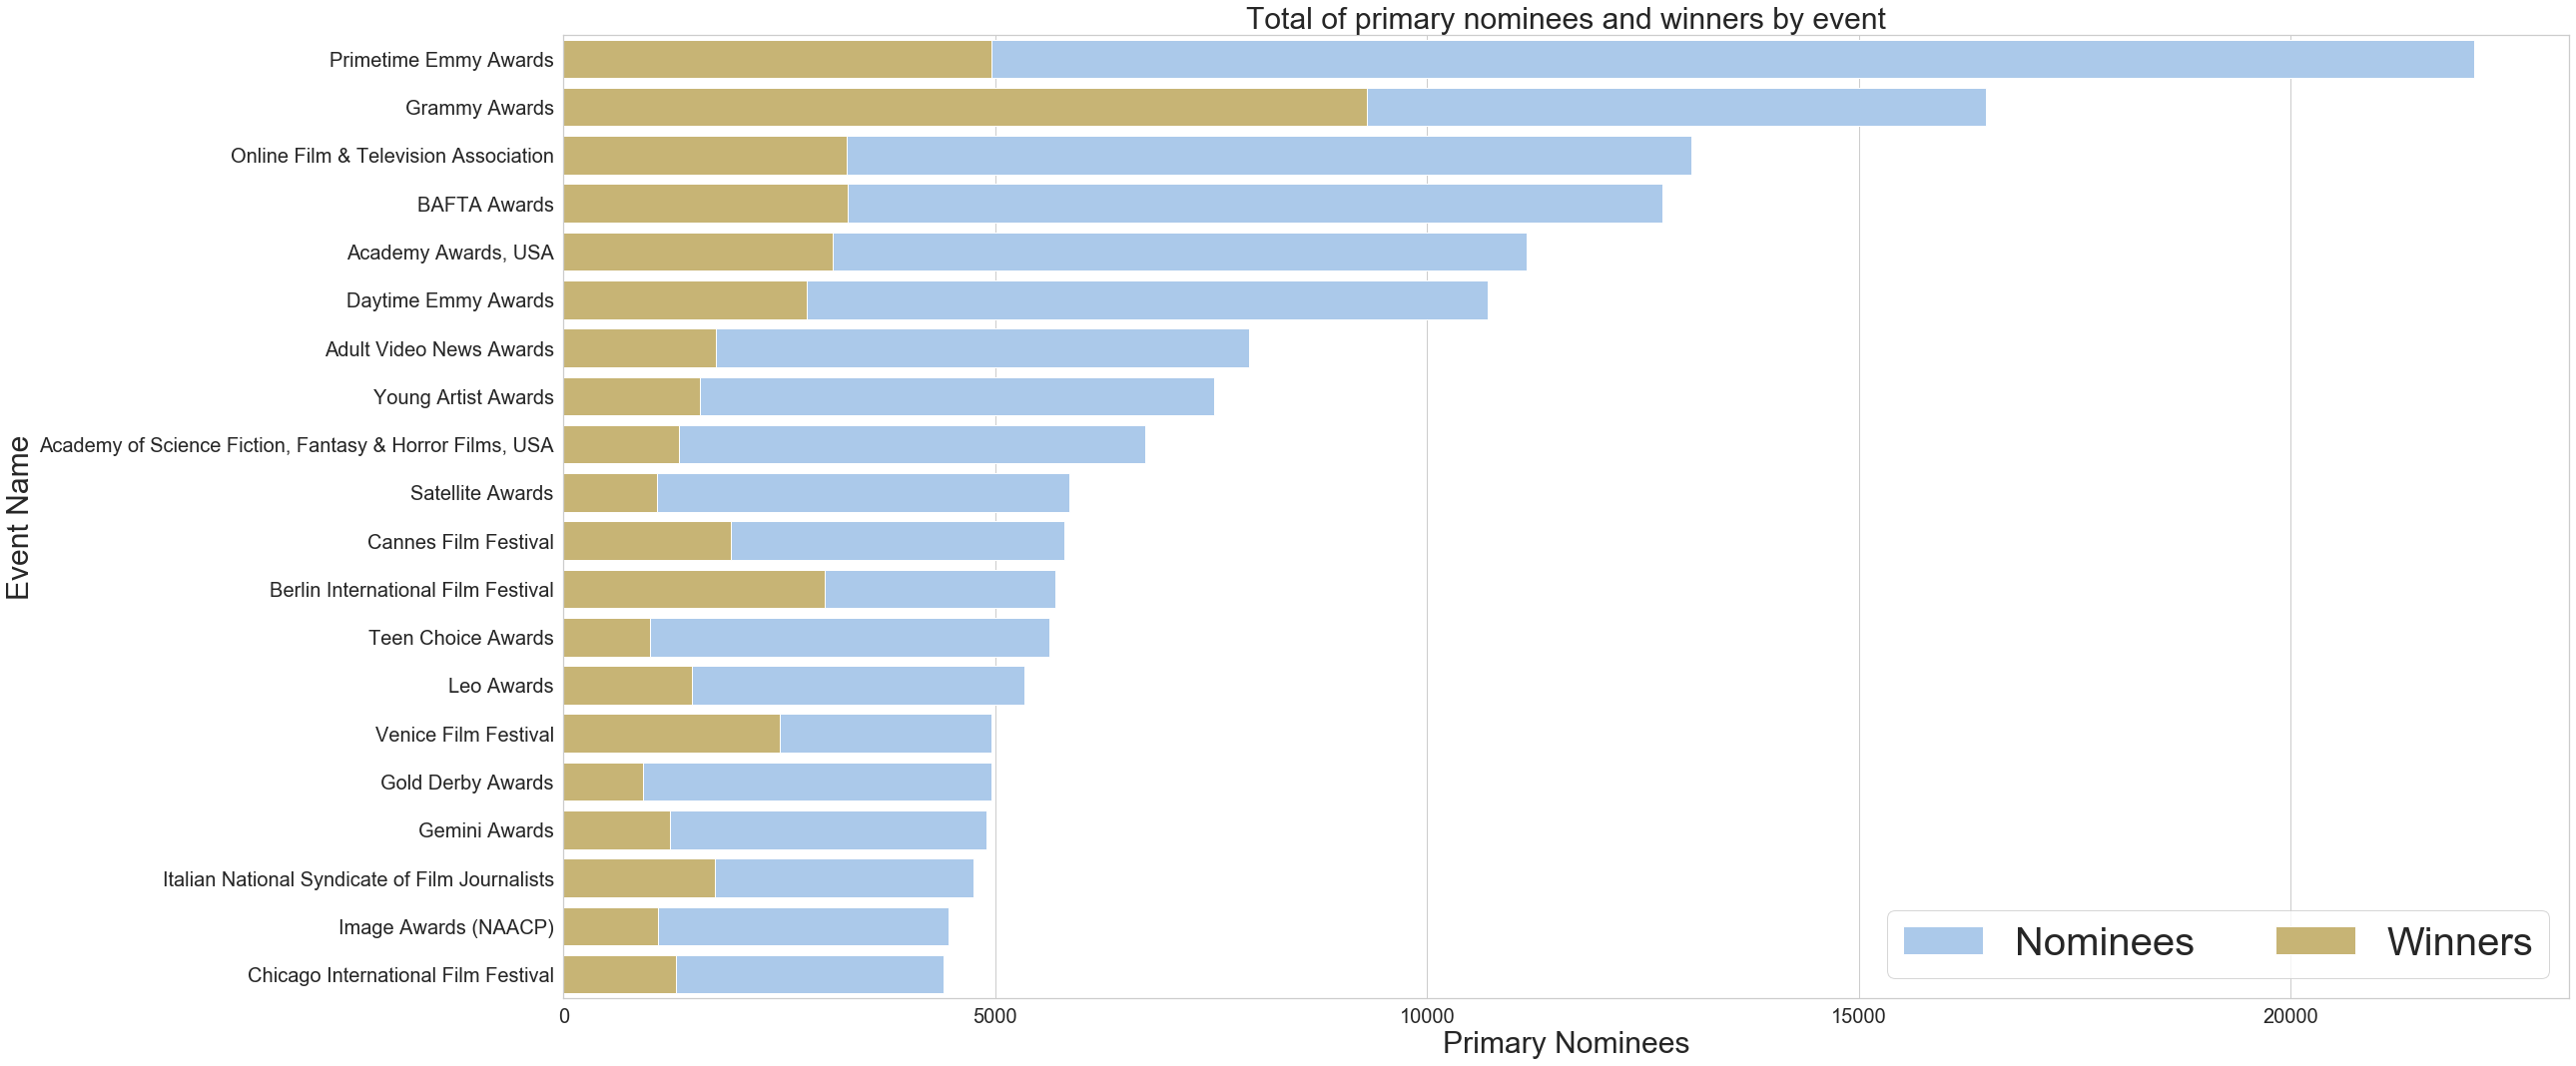

In [12]:
import seaborn as sns

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(36, 15))

sns.set_color_codes("pastel")

sns.barplot(x= top_events.N_nominees, y= top_events.eventName,
            label="Nominees", color="b")
sns.set_color_codes("muted")
sns.barplot(x = top_events.N_winners, y = top_events.eventName,
            label="Winners", color="y")
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize = 40)
ax.set_ylabel(ylabel="Event Name", fontsize = 30)
ax.set_xlabel(xlabel="Primary Nominees", fontsize = 30)
ax.tick_params(labelsize=20)
ax.set_title('Total of primary nominees and winners by event', fontsize = 30)
plt.tight_layout()

plt.savefig('./figures/total_primary_by_event.jpeg')

In [13]:
bytype_nominees = top_events_full.groupby(['isPerson','isTitle','isCompany'])['eventName'].value_counts().rename('N_nominees')
bytype_nominees = bytype_nominees.reset_index()
def get_type(isPerson):
    result ='Title'
    if isPerson :
        result = 'Person'
    return result
bytype_nominees['type'] = bytype_nominees.isPerson.apply(lambda x : get_type(x))
bytype_nominees = bytype_nominees[['eventName', 'N_nominees', 'type']]\
                        .merge(top_events[['eventName', 'N_nominees']], how = 'left', on = 'eventName',  suffixes = ('', '_total'))\
                        .sort_values(by ='N_nominees_total', ascending = False)

In [14]:
bytype_nominees.head()

,eventName,N_nominees,type,N_nominees_total
0,Primetime Emmy Awards,16824,Title,22122
22,Primetime Emmy Awards,5298,Person,22122
19,Grammy Awards,991,Title,16474
20,Grammy Awards,15483,Person,16474
2,Online Film & Television Association,9027,Title,13056


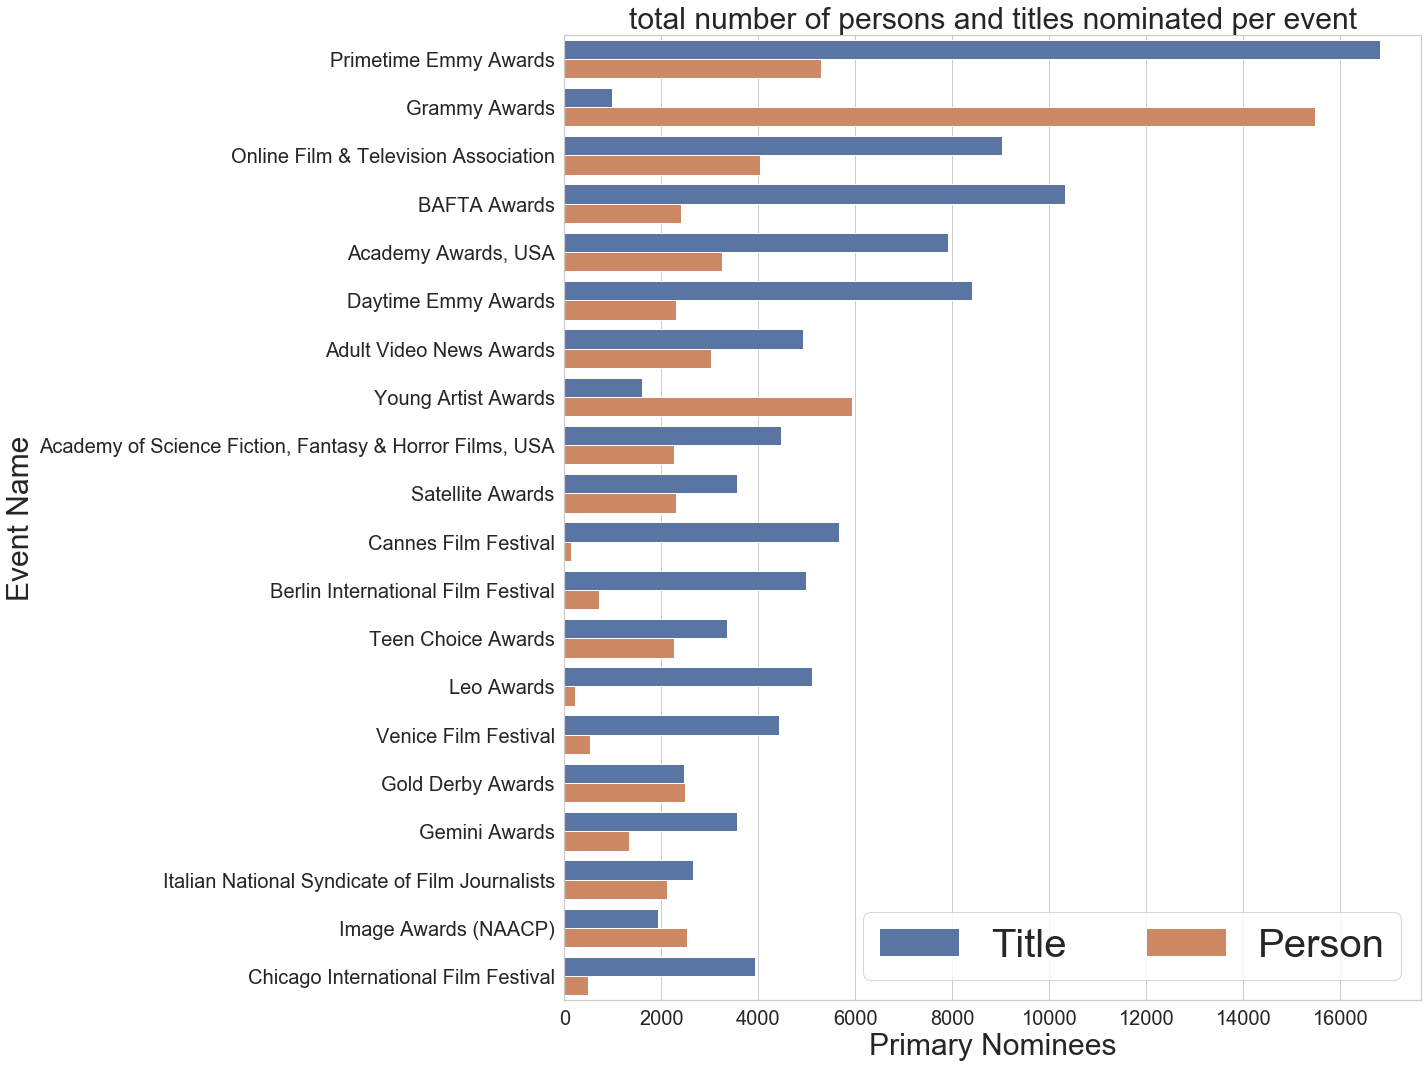

In [15]:
f, ax = plt.subplots(figsize=(20, 15))

sns.set_color_codes("pastel")

sns.barplot(x= 'N_nominees', y= 'eventName', hue = 'type', data = bytype_nominees)

ax.legend(ncol=2, loc="lower right", frameon=True, fontsize = 40)
ax.set_ylabel(ylabel="Event Name", fontsize = 30)
ax.set_xlabel(xlabel="Primary Nominees", fontsize = 30)
ax.tick_params(labelsize=20)
ax.set_title('total number of persons and titles nominated per event', fontsize = 30)
plt.tight_layout()

plt.savefig('./figures/titles_persons_distributions_by_event.jpeg')

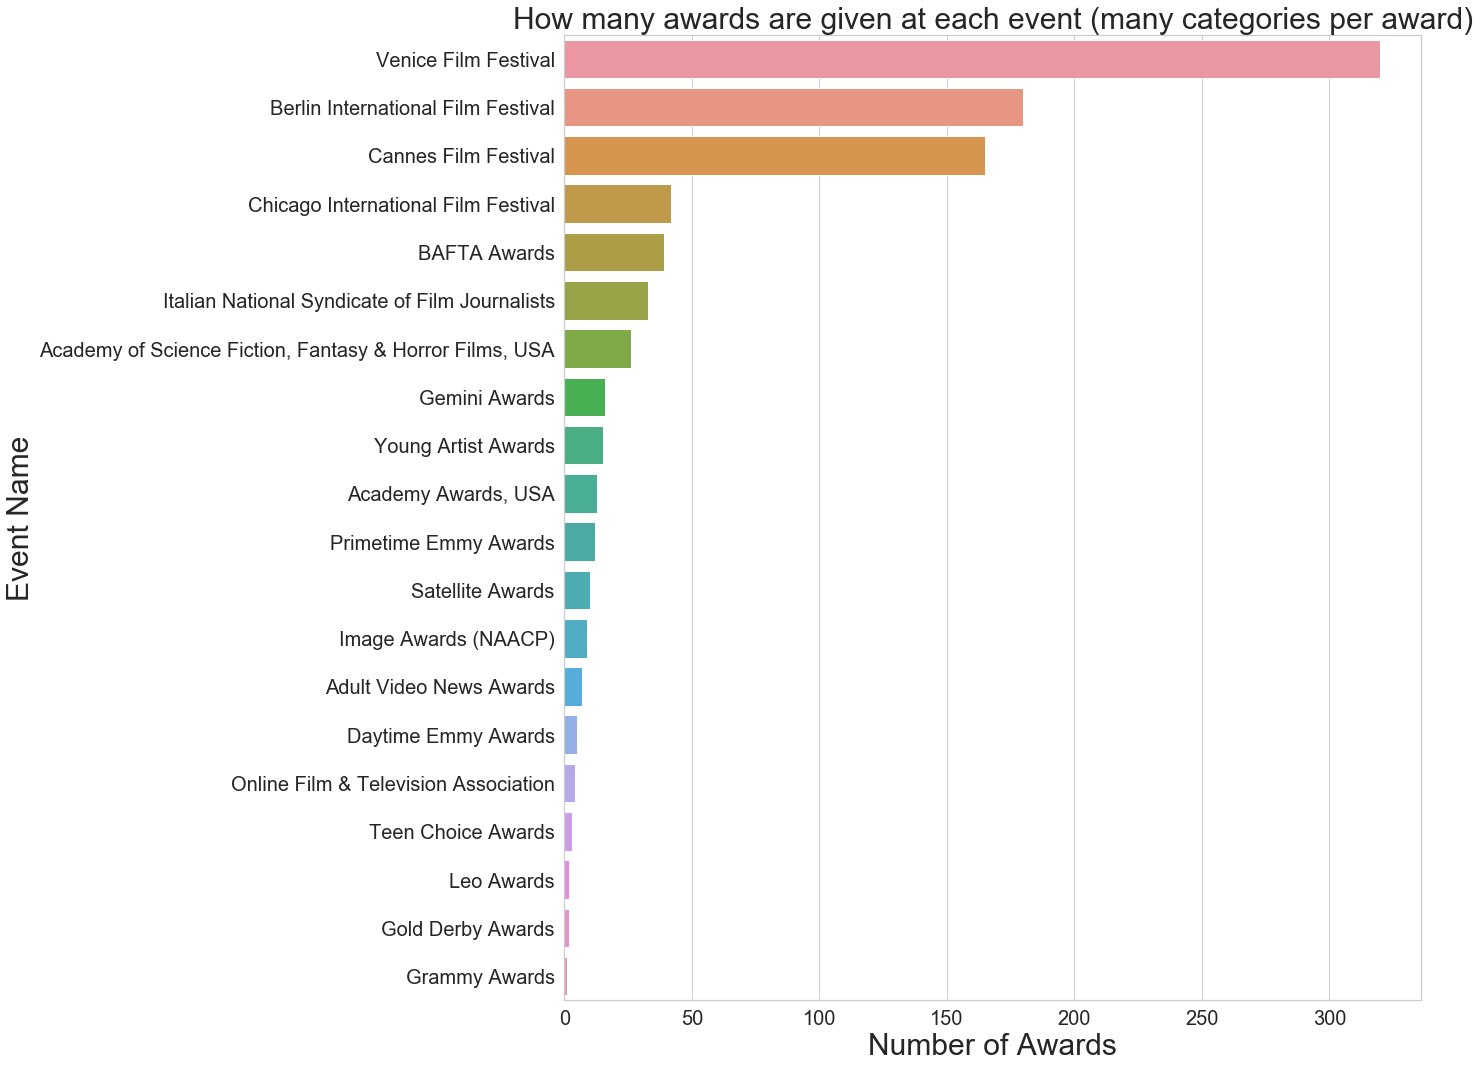

In [16]:
f, ax = plt.subplots(figsize=(20, 15))

sns.set_color_codes("pastel")

sns.barplot(x= 'N_awards_type', y= 'eventName', data = top_events.sort_values(by = 'N_awards_type', ascending = False))
ax.set_ylabel(ylabel="Event Name", fontsize = 30)
ax.set_xlabel(xlabel="Number of Awards", fontsize = 30)
ax.tick_params(labelsize=20)
ax.set_title('How many awards are given at each event (many categories per award)', fontsize = 30)
plt.tight_layout()

plt.savefig('./figures/awards_by_event.jpeg')

In [17]:
gpby_temp = top_events_full.groupby('eventName')['year']
top_events_boxes = gpby_temp.agg('max').reset_index(level = 0).merge(gpby_temp.agg('min').reset_index(level = 0), on = 'eventName', suffixes = ('_max', '_min'))
top_events_boxes['age'] = (top_events_boxes.year_max - top_events_boxes.year_min + 1)
top_events_boxes.sort_values(by = 'age', inplace = True, ascending = False)

In [18]:
top_events_boxes

,eventName,year_max,year_min,age
0,"Academy Awards, USA",2020,1929,92
18,Venice Film Festival,2019,1932,88
5,Cannes Film Festival,2019,1939,81
12,Italian National Syndicate of Film Journalists,2019,1946,74
3,BAFTA Awards,2020,1949,72
15,Primetime Emmy Awards,2019,1949,71
4,Berlin International Film Festival,2020,1951,70
10,Grammy Awards,2020,1959,62
6,Chicago International Film Festival,2019,1965,55
11,Image Awards (NAACP),2019,1969,51


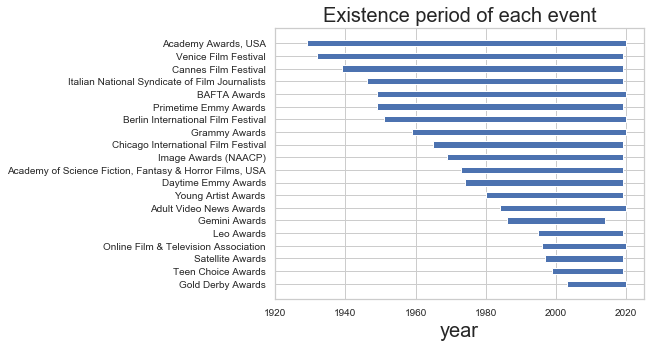

In [19]:
fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()

ax.barh(top_events_boxes.eventName, top_events_boxes.year_max - top_events_boxes.year_min, left=top_events_boxes.year_min, height=0.5)
ax.set_xlabel("year", fontsize = 20)
ax.set_ylabel("Event", fontsize = 20)
ax.set(xlim=(1920, 2025), ylabel="")
ax.tick_params(labelsize=10)
ax.set_title('Existence period of each event', fontsize = 20)
plt.tight_layout()

plt.savefig('./figures/activity_periods_by_event.jpeg')

## Awards Analysis

In [20]:
awards_nn = awards.groupby(['eventName', 'awardName']).size().reset_index().rename(columns = {0:'N_nominees'})
awards_minimax =awards.groupby(['eventName', 'awardName'])['year'].agg(['min','max']).reset_index()
awards_nn = awards_nn.merge(awards_minimax, on = ['eventName', 'awardName'])
awards_nn['age'] = awards_nn.apply(lambda row : (row['max'] - row['min'] +1), axis = 1)
awards_nn = awards_nn.rename(columns = {'max':'year_max', 'min':'year_min'}).sort_values(by = 'N_nominees', ascending = False).head(20)

In [21]:
top_awards = awards.drop('eventId',axis = 1)\
                    .merge(awards_nn, how = 'right', left_on = ['eventName', 'awardName'], right_on = ['eventName', 'awardName'])
top_awards.nunique()

eventName                 18
awardName                 20
year                      91
occurrence                 2
winAnnouncementTime     2473
categoryName            5826
nomeneeNote              498
name                   45815
originalName            3036
songNames               2468
episodeNames            7641
characterNames          3085
isWinner                   2
isPrimary                  1
isSecondary                1
isPerson                   2
isTitle                    2
isCompany                  1
const                  47381
notes                  25422
N_nominees                20
year_min                  18
year_max                   3
age                       18
dtype: int64

In [22]:
winners_vc = top_awards[top_awards.isWinner].awardName.value_counts()
top_awards['N_winners'] = top_awards.awardName.apply(lambda x : winners_vc[x])

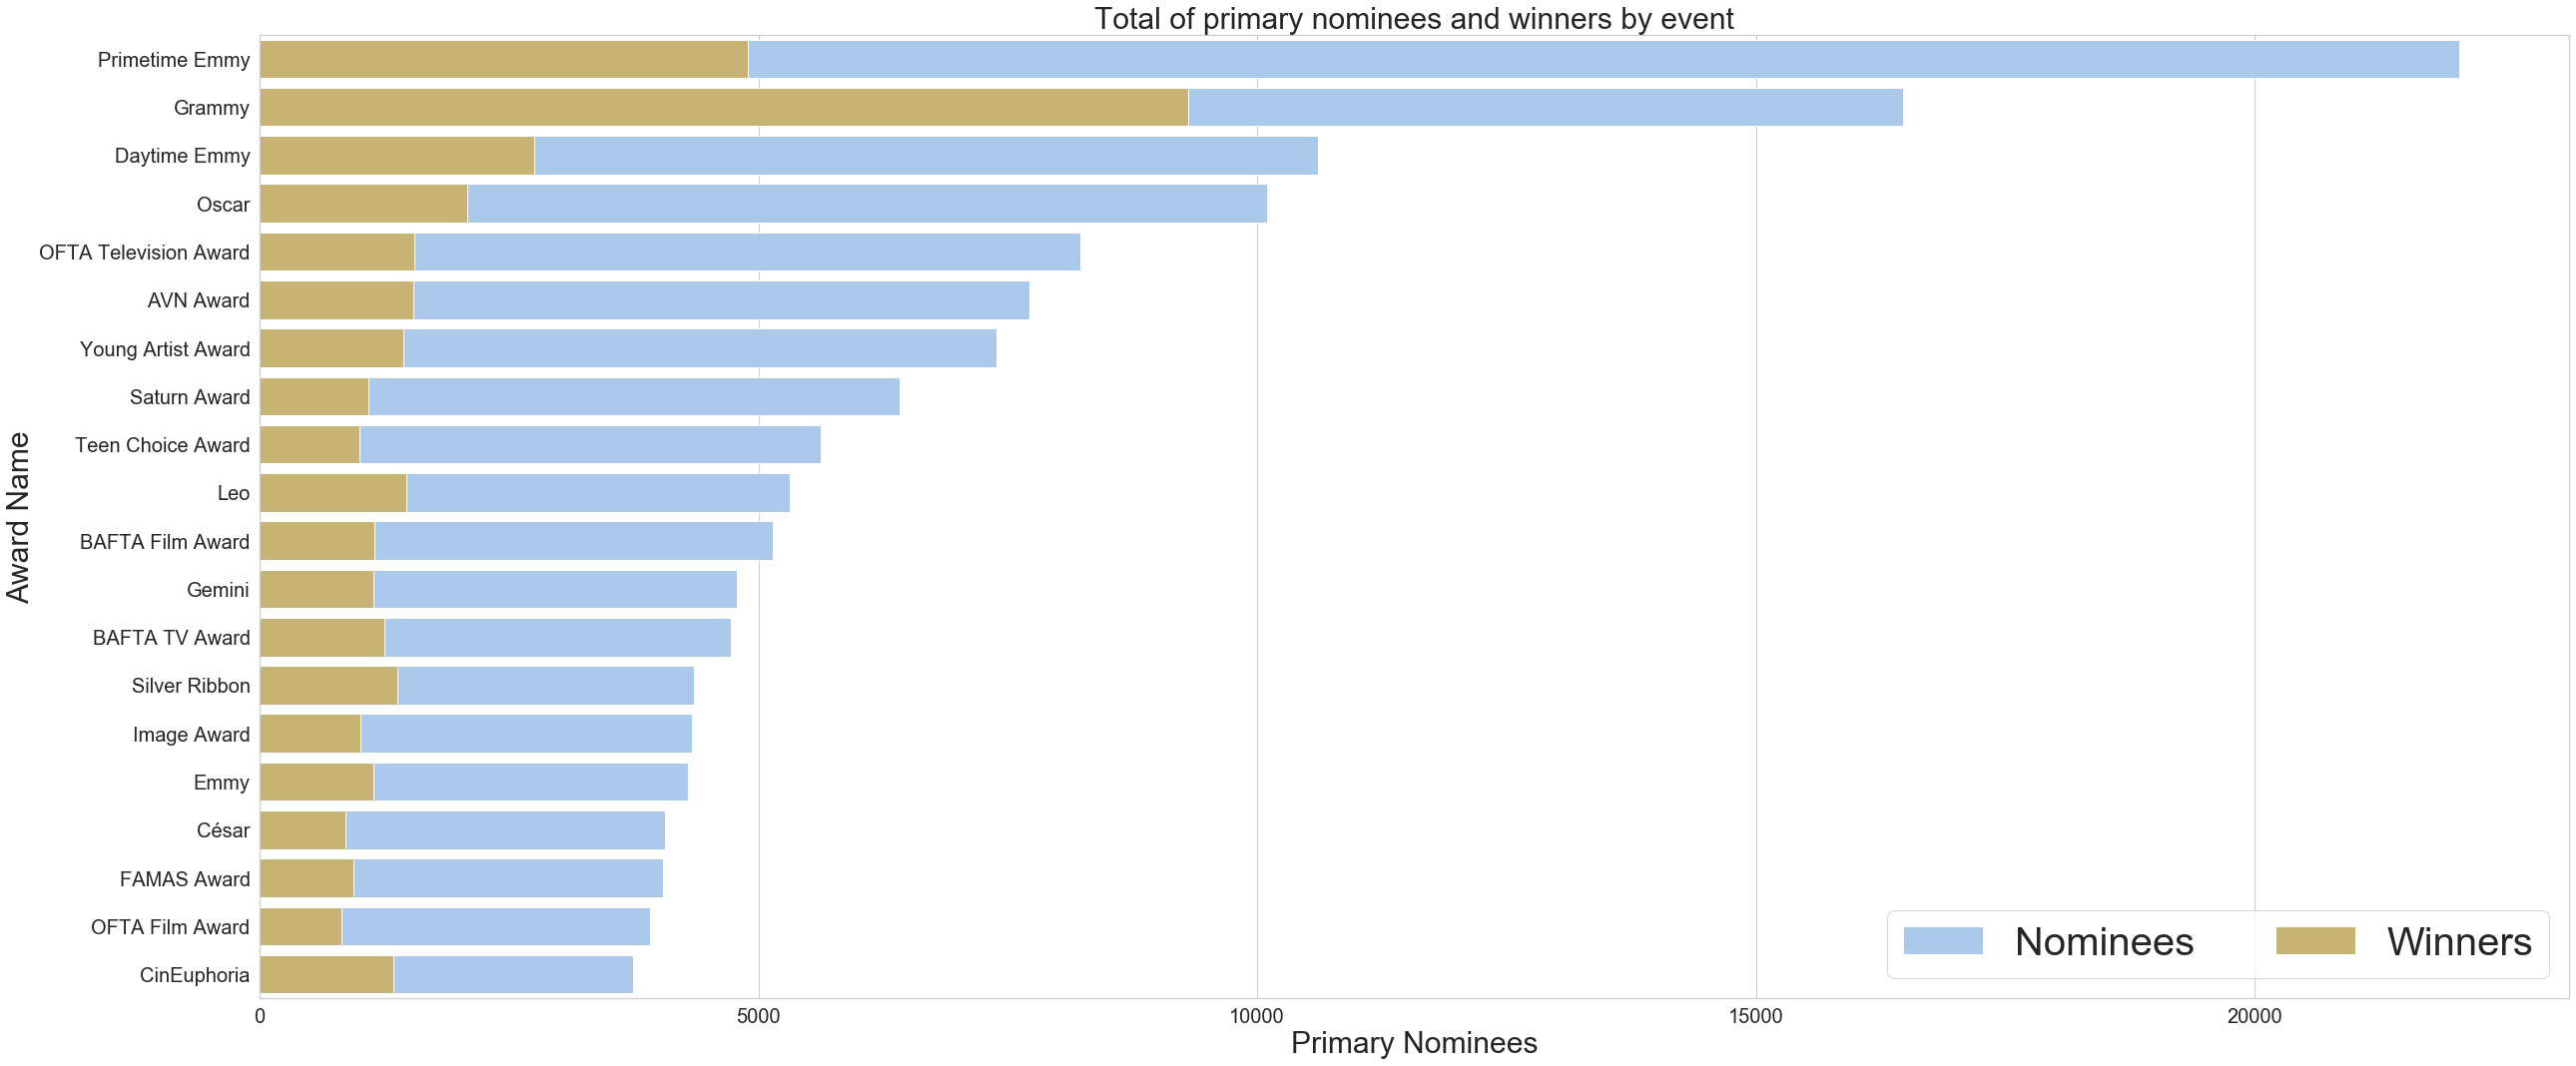

In [23]:
top_awards = top_awards.sort_values(by = 'N_nominees', ascending = False)

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(36, 15))

sns.set_color_codes("pastel")

sns.barplot(x= top_awards.N_nominees, y= top_awards.awardName,
            label="Nominees", color="b")
sns.set_color_codes("muted")
sns.barplot(x = top_awards.N_winners, y = top_awards.awardName,
            label="Winners", color="y")
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize = 40)
ax.set_ylabel(ylabel="Award Name", fontsize = 30)
ax.set_xlabel(xlabel="Primary Nominees", fontsize = 30)
ax.tick_params(labelsize=20)
ax.set_title('Total of primary nominees and winners by event', fontsize = 30)
plt.tight_layout()

plt.savefig('./figures/total_primary_by_award.jpeg')

In [24]:
bytype_nominees = top_awards.groupby(['isPerson','isTitle'])['awardName'].value_counts().rename('N_nominees')
bytype_nominees = bytype_nominees.reset_index()
def get_type(isPerson):
    result ='Title'
    if isPerson :
        result = 'Person'
    return result
bytype_nominees['type'] = bytype_nominees.isPerson.apply(lambda x : get_type(x))
bytype_nominees = bytype_nominees[['awardName', 'N_nominees', 'type']]\
                        .merge(top_awards[['awardName', 'N_nominees']].drop_duplicates(), how = 'left', on = 'awardName',  suffixes = ('', '_total'))\
                        .sort_values(by ='N_nominees_total', ascending = False)

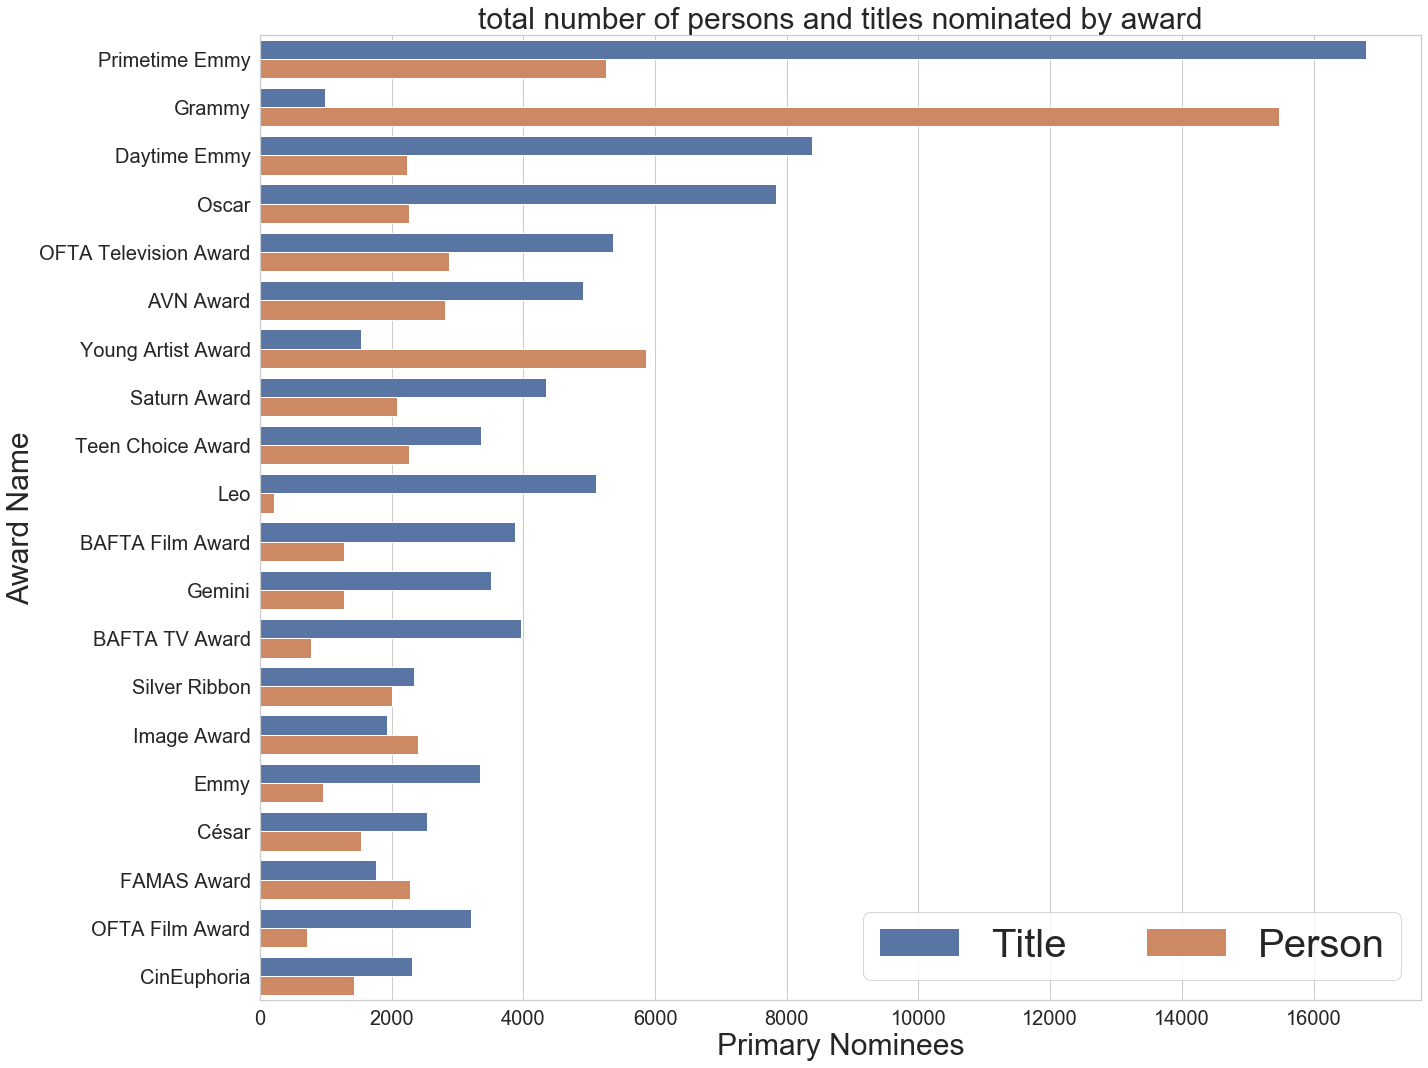

In [25]:
f, ax = plt.subplots(figsize=(20, 15))

sns.set_color_codes("pastel")

sns.barplot(x= 'N_nominees', y= 'awardName', hue = 'type', data = bytype_nominees)

ax.legend(ncol=2, loc="lower right", frameon=True, fontsize = 40)
ax.set_ylabel(ylabel="Award Name", fontsize = 30)
ax.set_xlabel(xlabel="Primary Nominees", fontsize = 30)
ax.tick_params(labelsize=20)
ax.set_title('total number of persons and titles nominated by award', fontsize = 30)
plt.tight_layout()

plt.savefig('./figures/titles_persons_distributions_by_award.jpeg')

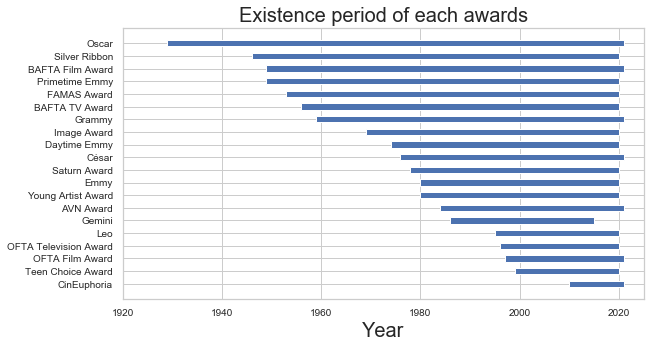

In [33]:
awards_nn = awards_nn.sort_values(by = 'age', ascending = False)

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()

ax.barh(awards_nn.awardName, awards_nn.age, left=awards_nn.year_min, height=0.5)
ax.set_xlabel("Year", fontsize = 20)
ax.set_ylabel("Award", fontsize = 20)
ax.set(xlim=(1920, 2025), ylabel="")
ax.tick_params(labelsize=10)
ax.set_title('Existence period of each awards', fontsize = 20)
plt.tight_layout()

plt.savefig('./figures/activity_periods_by_awards.jpeg')

# IMDB Movies

In [34]:
movies = pd.read_csv('./data/IMDb_movies.csv').dropna(subset = ['title', 'original_title', 'country'])

In [35]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


In [36]:
movies['country'] = movies['country'].apply(lambda x : x.split(', '))
movies = movies.explode('country')

In [37]:
def country_clean(name):
    if name == 'UK':
        return 'United Kingdom'
    if name == 'Soviet Union':
        return 'Russia'
    if name == 'West Germany':
        return 'Germany'
    if name == 'USA':
        return 'United States of America'
    return name
movies['country'] = movies.country.apply(lambda x : country_clean(x))

In [42]:
country_vc = movies.country.value_counts()
mdn = country_vc.describe().quantile([0.75])
countries_freq = country_vc.reset_index(level = 0)\
                                .rename(columns = {'country' : 'frequency','index': 'country'})
countries_freq = countries_freq[countries_freq.frequency.apply(lambda x: x>= mdn[0.75])]

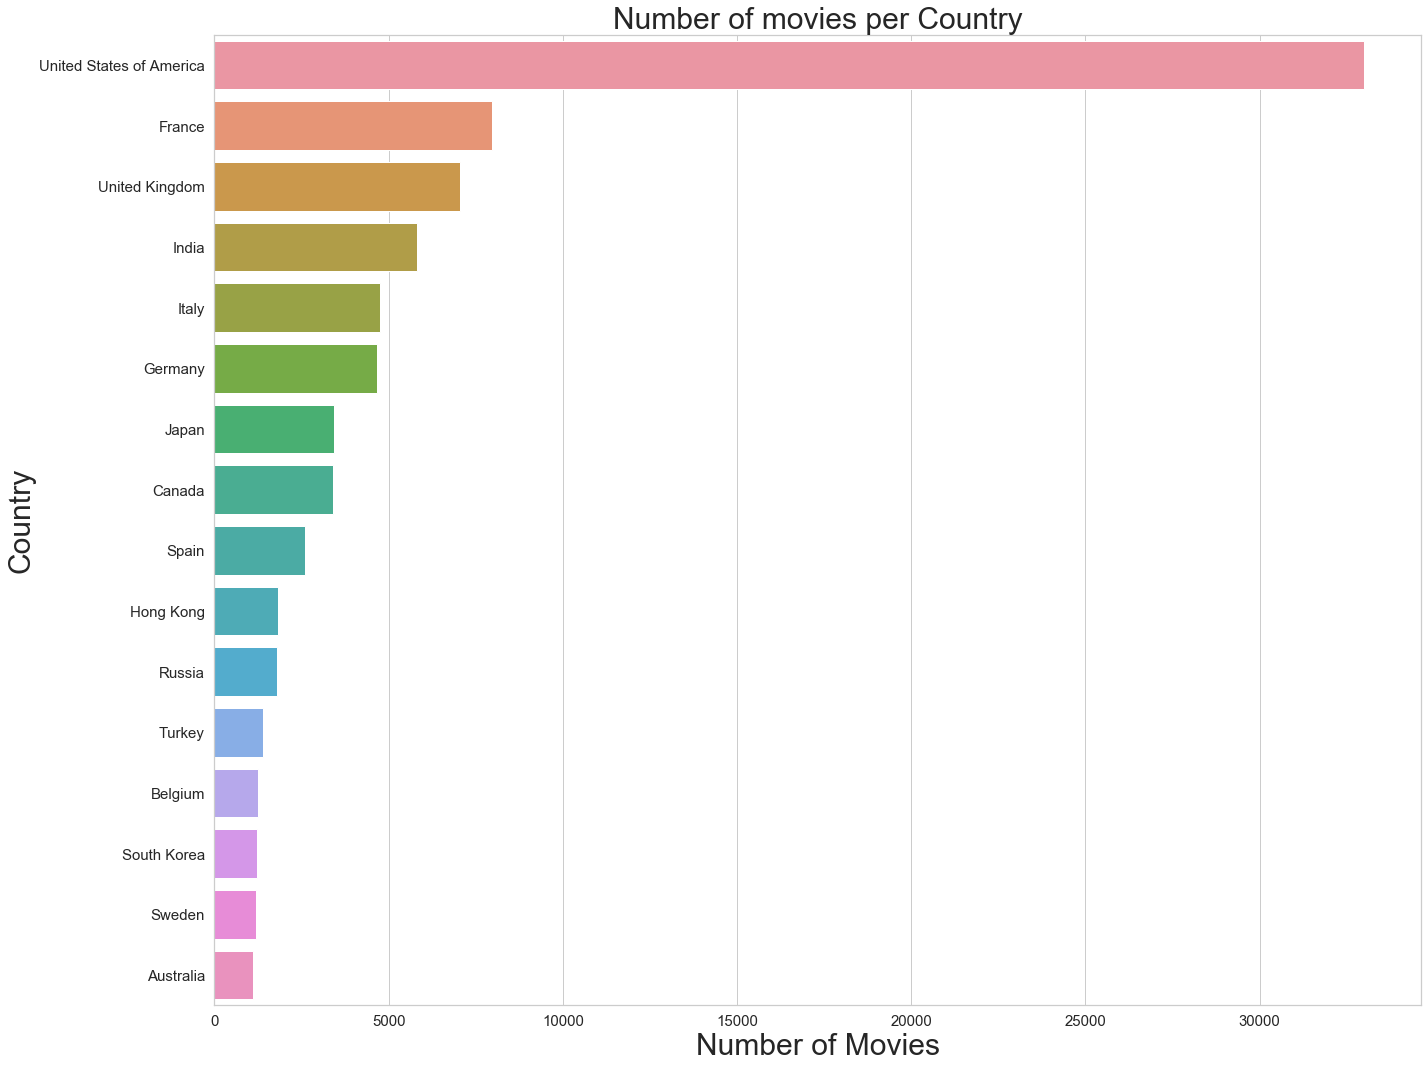

In [43]:
f, ax = plt.subplots(figsize=(20, 15))

sns.set_color_codes("pastel")

sns.barplot(x= 'frequency', y= 'country', data = countries_freq)
ax.set_ylabel(ylabel="Country", fontsize = 30)
ax.set_xlabel(xlabel="Number of Movies", fontsize = 30)
ax.tick_params(labelsize=15)
ax.set_title('Number of movies per Country', fontsize = 30)
plt.tight_layout()

plt.savefig('./figures/imdb_movies_by_country.jpeg')

In [44]:
import folium
country_geo = './data/world-countries.json'
map = folium.Map(location=[100, 0], zoom_start=1.5)


map.choropleth(geo_data=country_geo, data=countries_freq,
             columns=['country', 'frequency'],
             key_on='feature.properties.name',
             fill_color='YlOrRd', line_opacity=0.2)
map.save('figures/imdb_movies_map.html')

C:\Users\ybouq\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
